In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ayan
Processing Record 2 of Set 1 | manggar
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | ariquemes
Processing Record 7 of Set 1 | aktash
Processing Record 8 of Set 1 | gijon
Processing Record 9 of Set 1 | tautira
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | tabory
Processing Record 12 of Set 1 | nuuk
Processing Record 13 of Set 1 | pringsewu
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | hereford
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 22 of Set 1 | ponta delgada
Processing Reco

Processing Record 39 of Set 4 | ishigaki
Processing Record 40 of Set 4 | buluang
Processing Record 41 of Set 4 | kenai
Processing Record 42 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 4 | alofi
Processing Record 44 of Set 4 | sisimiut
Processing Record 45 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 46 of Set 4 | launceston
Processing Record 47 of Set 4 | bambous virieux
Processing Record 48 of Set 4 | umtata
Processing Record 49 of Set 4 | bubaque
Processing Record 50 of Set 4 | vardo
Processing Record 1 of Set 5 | cockburn town
Processing Record 2 of Set 5 | saint-joseph
Processing Record 3 of Set 5 | san javier
Processing Record 4 of Set 5 | turbat
Processing Record 5 of Set 5 | srisailam
Processing Record 6 of Set 5 | kaupanger
Processing Record 7 of Set 5 | mizan teferi
Processing Record 8 of Set 5 | rocha
Processing Record 9 of Set 5 | pointe michel
Processing Record 10 of Set 5 | acajutla
Processing Record 11 of Set 5

Processing Record 28 of Set 8 | jackson
Processing Record 29 of Set 8 | novopokrovka
Processing Record 30 of Set 8 | marcona
City not found. Skipping...
Processing Record 31 of Set 8 | hualmay
Processing Record 32 of Set 8 | paamiut
Processing Record 33 of Set 8 | dunedin
Processing Record 34 of Set 8 | lata
Processing Record 35 of Set 8 | srednekolymsk
Processing Record 36 of Set 8 | pacific grove
Processing Record 37 of Set 8 | pervomayskoye
Processing Record 38 of Set 8 | mareeba
Processing Record 39 of Set 8 | oranjemund
Processing Record 40 of Set 8 | wageningen
Processing Record 41 of Set 8 | masuguru
Processing Record 42 of Set 8 | bonthe
Processing Record 43 of Set 8 | sakaiminato
Processing Record 44 of Set 8 | santa rosa
Processing Record 45 of Set 8 | bermejillo
Processing Record 46 of Set 8 | nisia floresta
Processing Record 47 of Set 8 | mandan
Processing Record 48 of Set 8 | nome
Processing Record 49 of Set 8 | labuan
Processing Record 50 of Set 8 | gracac
Processing Reco

Processing Record 16 of Set 12 | marfino
Processing Record 17 of Set 12 | acari
Processing Record 18 of Set 12 | panama city
Processing Record 19 of Set 12 | muyezerskiy
Processing Record 20 of Set 12 | asayita
City not found. Skipping...
Processing Record 21 of Set 12 | san francisco
Processing Record 22 of Set 12 | bandarbeyla
Processing Record 23 of Set 12 | pecos
Processing Record 24 of Set 12 | shelburne
Processing Record 25 of Set 12 | lolua
City not found. Skipping...
Processing Record 26 of Set 12 | maniitsoq
Processing Record 27 of Set 12 | melita
Processing Record 28 of Set 12 | broken hill
Processing Record 29 of Set 12 | kangaatsiaq
Processing Record 30 of Set 12 | ibra
Processing Record 31 of Set 12 | vieux fort
Processing Record 32 of Set 12 | salinopolis
Processing Record 33 of Set 12 | kuche
City not found. Skipping...
Processing Record 34 of Set 12 | adrar
Processing Record 35 of Set 12 | ransang
Processing Record 36 of Set 12 | corum
Processing Record 37 of Set 12 | w

In [14]:
len(city_data)

560

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ayan,56.4500,138.1667,10.51,69,86,16.60,RU,2021-11-15 16:42:20
1,Manggar,-2.8833,108.2667,78.89,82,100,3.65,ID,2021-11-15 16:42:20
2,Albany,42.6001,-73.9662,45.09,71,91,7.00,US,2021-11-15 16:42:21
3,Mataura,-46.1927,168.8643,41.86,99,100,2.82,NZ,2021-11-15 16:42:22
4,Port Lincoln,-34.7333,135.8667,53.76,70,21,4.16,AU,2021-11-15 16:42:23
5,Ariquemes,-9.9133,-63.0408,87.03,66,93,5.48,BR,2021-11-15 16:42:23
6,Aktash,50.3000,87.7333,9.18,70,84,7.61,RU,2021-11-15 16:42:24
7,Gijon,43.5357,-5.6615,57.79,87,63,1.01,ES,2021-11-15 16:42:24
8,Tautira,-17.7333,-149.1500,80.62,77,96,15.05,PF,2021-11-15 16:42:25
9,Hamilton,39.1834,-84.5333,42.60,66,1,3.00,US,2021-11-15 16:40:39


In [16]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ayan,RU,2021-11-15 16:42:20,56.4500,138.1667,10.51,69,86,16.60
1,Manggar,ID,2021-11-15 16:42:20,-2.8833,108.2667,78.89,82,100,3.65
2,Albany,US,2021-11-15 16:42:21,42.6001,-73.9662,45.09,71,91,7.00
3,Mataura,NZ,2021-11-15 16:42:22,-46.1927,168.8643,41.86,99,100,2.82
4,Port Lincoln,AU,2021-11-15 16:42:23,-34.7333,135.8667,53.76,70,21,4.16
5,Ariquemes,BR,2021-11-15 16:42:23,-9.9133,-63.0408,87.03,66,93,5.48
6,Aktash,RU,2021-11-15 16:42:24,50.3000,87.7333,9.18,70,84,7.61
7,Gijon,ES,2021-11-15 16:42:24,43.5357,-5.6615,57.79,87,63,1.01
8,Tautira,PF,2021-11-15 16:42:25,-17.7333,-149.1500,80.62,77,96,15.05
9,Hamilton,US,2021-11-15 16:40:39,39.1834,-84.5333,42.60,66,1,3.00


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

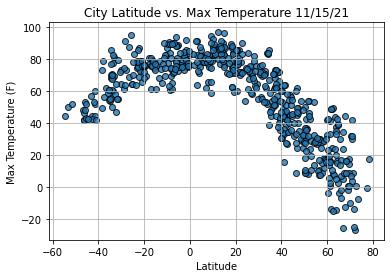

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

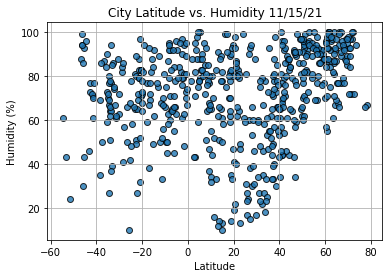

In [22]:

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

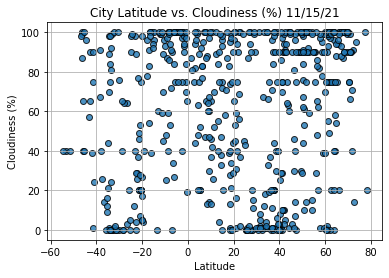

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

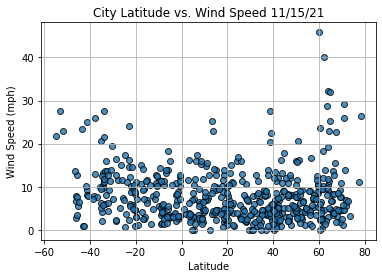

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
#Create the Hemisphere DataFrames
#We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ayan,RU,2021-11-15 16:42:20,56.4500,138.1667,10.51,69,86,16.60
2,Albany,US,2021-11-15 16:42:21,42.6001,-73.9662,45.09,71,91,7.00
6,Aktash,RU,2021-11-15 16:42:24,50.3000,87.7333,9.18,70,84,7.61
7,Gijon,ES,2021-11-15 16:42:24,43.5357,-5.6615,57.79,87,63,1.01
9,Hamilton,US,2021-11-15 16:40:39,39.1834,-84.5333,42.60,66,1,3.00


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

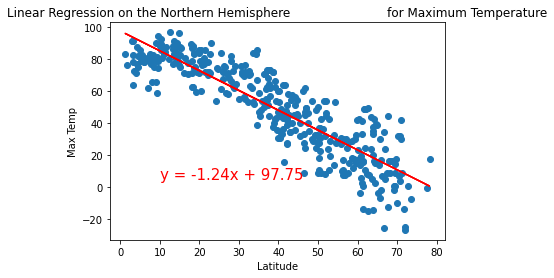

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,5))

In [41]:
linregress(x_values,y_values)

LinregressResult(slope=-1.2422672996784345, intercept=97.74684970420999, rvalue=-0.8799912228881516, pvalue=3.247146777315629e-126, stderr=0.0342180704981563, intercept_stderr=1.4945230644697283)

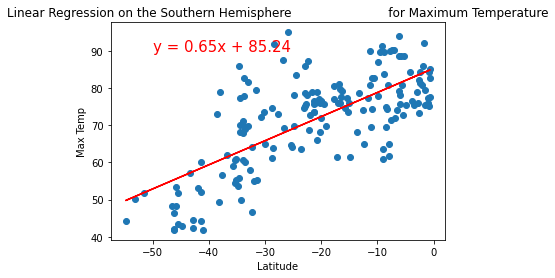

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [39]:
linregress(x_values,y_values)

LinregressResult(slope=0.6471311781366307, intercept=85.23807363028551, rvalue=0.7128019671518245, pvalue=2.695332311627262e-28, stderr=0.04855159683262979, intercept_stderr=1.2376944187087615)

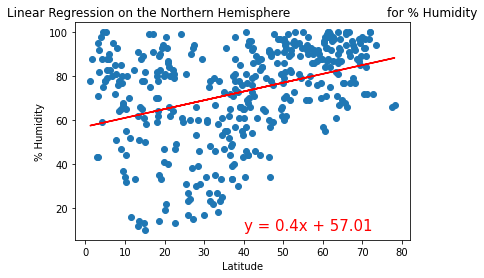

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [43]:
linregress(x_values,y_values)

LinregressResult(slope=0.4003143907564752, intercept=57.009757672967275, rvalue=0.3624531572266925, pvalue=1.9914064292343792e-13, stderr=0.05252917050958988, intercept_stderr=2.29428649076736)

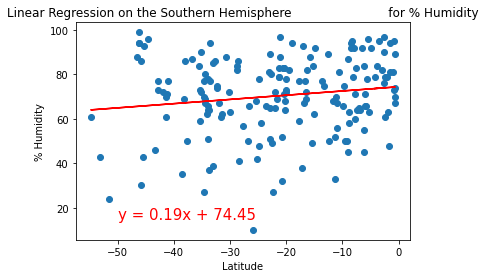

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [46]:
linregress(x_values,y_values)

LinregressResult(slope=0.18991691692971255, intercept=74.45348698319802, rvalue=0.15171846498821387, pvalue=0.04566646295671084, stderr=0.09434180030905359, intercept_stderr=2.404994424714322)

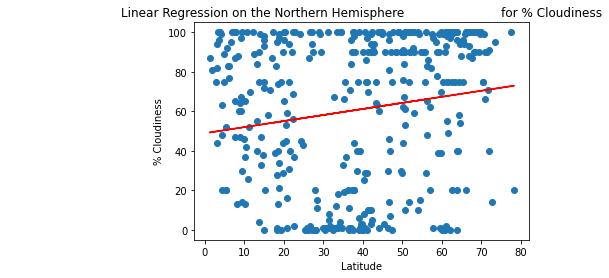

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [51]:
linregress(x_values,y_values)

LinregressResult(slope=0.3069592773451783, intercept=48.92275188895598, rvalue=0.16569475946337903, pvalue=0.0010852425837143075, stderr=0.09323120263729676, intercept_stderr=4.07200583321022)

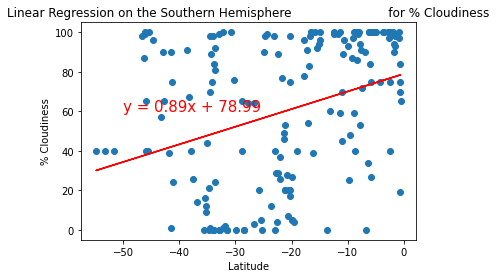

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [49]:
linregress(x_values,y_values)

LinregressResult(slope=0.8921745529915752, intercept=78.98760151778724, rvalue=0.33460358798508233, pvalue=6.401491467261491e-06, stderr=0.19158935981323383, intercept_stderr=4.884063486980067)

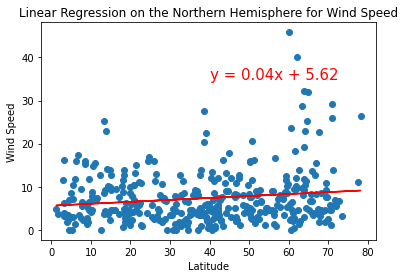

In [62]:
# Linear regression on the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

In [63]:
linregress(x_values,y_values)

LinregressResult(slope=0.044942390961749575, intercept=5.617164501940549, rvalue=0.1462590494518074, pvalue=0.003980334328218993, stderr=0.015512159441109499, intercept_stderr=0.6775157022871624)

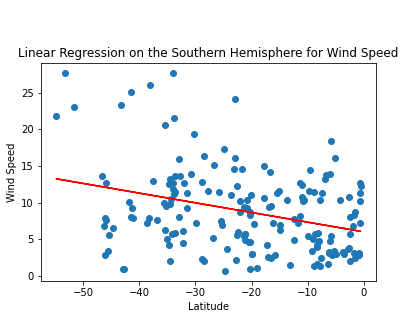

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

In [65]:
linregress(x_values,y_values)

LinregressResult(slope=-0.13207934383079928, intercept=6.0103773932991, rvalue=-0.3234061111576522, pvalue=1.3439374824053056e-05, stderr=0.02946680576253184, intercept_stderr=0.7511781982204557)